In [2]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm_notebook as tqdm
%matplotlib inline

In [3]:
image_test_list = []
for i in range(5):
    for j in range(5):
        for k in range(5): 
            image_test_list.append(np.array([np.uint8(i*50),np.uint8(j*50),np.uint8(k*50)]))
image_test_list = np.array([list(image_test_list)])

In [4]:
img_amelie = cv2.imread('./imgs/amelie.png')
#img_amelie = cv2.resize(img_amelie, (100, 50)) 
#img_amelie = image_test_list

In [14]:
img_amelie

array([[[ 0, 39, 53],
        [ 0, 37, 51],
        [ 4, 43, 57],
        ..., 
        [ 2, 25, 41],
        [ 2, 23, 38],
        [ 3, 22, 37]],

       [[ 0, 39, 53],
        [ 0, 37, 51],
        [ 4, 43, 57],
        ..., 
        [ 2, 25, 41],
        [ 2, 23, 38],
        [ 3, 22, 37]],

       [[ 0, 39, 53],
        [ 0, 37, 51],
        [ 4, 43, 57],
        ..., 
        [ 0, 25, 41],
        [ 0, 23, 38],
        [ 1, 22, 37]],

       ..., 
       [[ 0, 11,  3],
        [ 0, 11,  3],
        [ 0, 11,  3],
        ..., 
        [ 0, 15, 21],
        [ 0, 15, 21],
        [ 0, 15, 21]],

       [[ 0, 11,  3],
        [ 0, 11,  3],
        [ 0, 11,  3],
        ..., 
        [ 0, 15, 21],
        [ 0, 15, 21],
        [ 0, 15, 21]],

       [[ 0, 11,  3],
        [ 0, 11,  3],
        [ 0, 11,  3],
        ..., 
        [ 0, 15, 21],
        [ 0, 15, 21],
        [ 0, 15, 21]]], dtype=uint8)

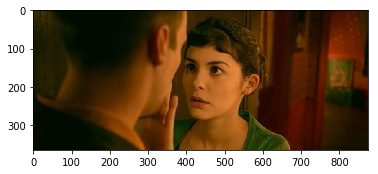

In [5]:
plt.imshow(cv2.cvtColor(img_amelie, cv2.COLOR_BGR2RGB))
plt.show()

In [399]:
def norm(x):
    return (int(x[0])**(2) + int(x[1])**(2) + int(x[2])**(2))**(1/2)

In [400]:
def distance_between(x,y):
    return ((int(x[0])-int(y[0]))**(2) + (int(x[1])-int(y[1]))**(2) + (int(x[2])-int(y[2]))**(2))**(1/2)

In [401]:
norm([1,1,1])

1.7320508075688772

### First signature

In [402]:
img_reshaped = np.reshape(img_amelie, (img_amelie.size//3,3))
img_reshaped_array = np.array([img_reshaped])

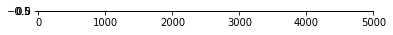

In [403]:
plt.imshow(cv2.cvtColor(img_reshaped_array, cv2.COLOR_BGR2RGB))
plt.show()

In [404]:
resized_image = cv2.resize(img_reshaped_array, (500, 100)) 

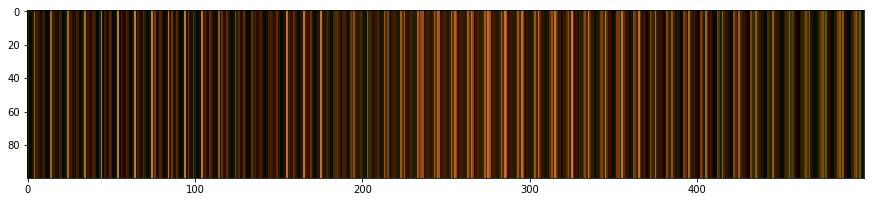

In [405]:
plt.figure(figsize=(15,5))
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

### Second signature

In [406]:
img_series = pd.Series(list(img_reshaped))

In [407]:
img_series.head(5)

0    [1, 40, 53]
1    [3, 40, 53]
2    [3, 33, 49]
3    [1, 36, 51]
4    [4, 40, 50]
dtype: object

In [408]:
img_series.index = img_series.apply(norm)

In [409]:
img_series = img_series.sort_index()

In [410]:
img_reshaped_array = np.array([list(img_series)])

In [411]:
resized_image = cv2.resize(img_reshaped_array, (500, 100)) 

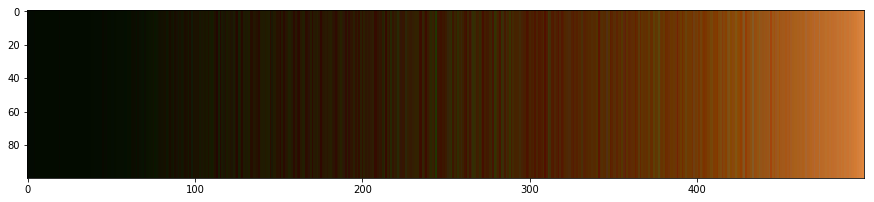

In [412]:
plt.figure(figsize=(15,5))
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

### Third signature

In [413]:
img_series = pd.Series(list(img_reshaped))

In [414]:
img_series.index = img_series.apply(norm)

In [415]:
img_series = img_series.sort_index()

In [416]:
array_len = len(img_series)
for i in tqdm(range(array_len)):
    img_series_copy = img_series.copy()
    previous_series = img_series_copy.head(i)
    next_series = img_series_copy.tail(len(img_series_copy)-i)
    if len(previous_series) > 0:
        last_element = previous_series.tail(1)
        next_series.index = next_series.apply(lambda x:distance_between(x,last_element.values[0]))
        next_series = next_series.sort_index()
    img_series = pd.concat([previous_series, next_series])

HBox(children=(IntProgress(value=0, max=5000), HTML(value='')))

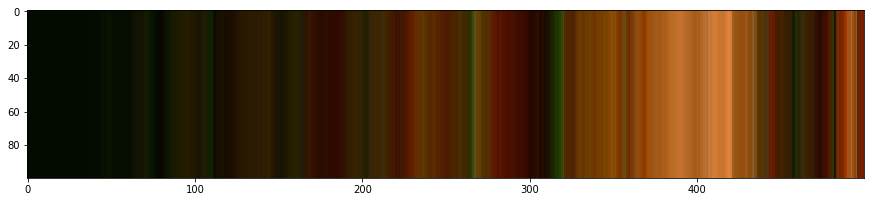

In [417]:
img_reshaped_array = np.array([list(img_series)])
resized_image = cv2.resize(img_reshaped_array, (500, 100)) 
plt.figure(figsize=(15,5))
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

### Fourth signature

In [69]:
n = 25
seed = []
for i in range(256//n):
    seed.append(i*n)

In [70]:
last = seed[-1]

In [71]:
dict_cubes = {}

In [72]:
for i in seed:
    for j in seed:
        for k in seed:
            dict_cubes[(i,j,k)] = 0

In [73]:
dict_cubes

{(0, 0, 0): 0,
 (0, 0, 25): 0,
 (0, 0, 50): 0,
 (0, 0, 75): 0,
 (0, 0, 100): 0,
 (0, 0, 125): 0,
 (0, 0, 150): 0,
 (0, 0, 175): 0,
 (0, 0, 200): 0,
 (0, 0, 225): 0,
 (0, 25, 0): 0,
 (0, 25, 25): 0,
 (0, 25, 50): 0,
 (0, 25, 75): 0,
 (0, 25, 100): 0,
 (0, 25, 125): 0,
 (0, 25, 150): 0,
 (0, 25, 175): 0,
 (0, 25, 200): 0,
 (0, 25, 225): 0,
 (0, 50, 0): 0,
 (0, 50, 25): 0,
 (0, 50, 50): 0,
 (0, 50, 75): 0,
 (0, 50, 100): 0,
 (0, 50, 125): 0,
 (0, 50, 150): 0,
 (0, 50, 175): 0,
 (0, 50, 200): 0,
 (0, 50, 225): 0,
 (0, 75, 0): 0,
 (0, 75, 25): 0,
 (0, 75, 50): 0,
 (0, 75, 75): 0,
 (0, 75, 100): 0,
 (0, 75, 125): 0,
 (0, 75, 150): 0,
 (0, 75, 175): 0,
 (0, 75, 200): 0,
 (0, 75, 225): 0,
 (0, 100, 0): 0,
 (0, 100, 25): 0,
 (0, 100, 50): 0,
 (0, 100, 75): 0,
 (0, 100, 100): 0,
 (0, 100, 125): 0,
 (0, 100, 150): 0,
 (0, 100, 175): 0,
 (0, 100, 200): 0,
 (0, 100, 225): 0,
 (0, 125, 0): 0,
 (0, 125, 25): 0,
 (0, 125, 50): 0,
 (0, 125, 75): 0,
 (0, 125, 100): 0,
 (0, 125, 125): 0,
 (0, 125, 150): 

In [74]:
for i in img_amelie:
    for j in i:
        b = j[0]
        g = j[1]
        r = j[2]
        b = b - (b % n)
        g = g - (g % n)
        r = r - (r % n)
        index = (b, g, r)
        dict_cubes[index] = dict_cubes[index] + 1

In [75]:
img_signature = []
for i in dict_cubes:
    num = dict_cubes[i]
    for k in range(num):
        img_signature.append([np.uint8(i[0]),np.uint8(i[1]),np.uint8(i[2])])
        #img_signature.append([i[0],i[1],i[2]])

In [76]:
img_signature

[[0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0,

In [77]:
img_signature = np.array([img_signature])
img_signature = cv2.resize(img_signature, (500, 100)) 

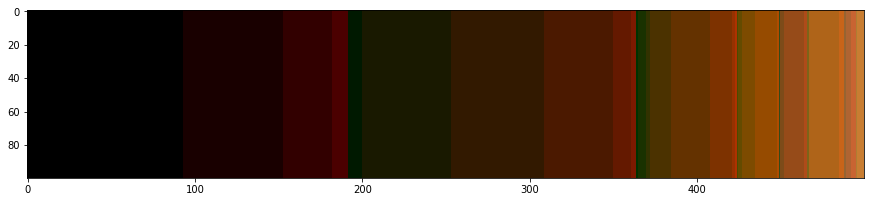

In [78]:
#
plt.figure(figsize=(15,5))
plt.imshow(cv2.cvtColor(img_signature, cv2.COLOR_BGR2RGB))
plt.show()